In [ ]:
#gdrive connect
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 9.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
pip install accelerate -U

In [ ]:
!pip install torch torchvision transformers

In [ ]:
!pip install rouge-score nltk

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=0e418d4c799492b14ac332f86891fcce8c5f17e98d41ef6284bcc07d43dd5d66
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install Datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12

In [ ]:
#imports
import json
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import DataLoader, Dataset
from datasets import Dataset
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
import torch.nn.functional as F
import pandas as pd
from transformers import BertTokenizer
# from transformers import GPT2Tokenizer, GPT2LMHeadModel
import os
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from collections import Counter
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import random

In [ ]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

from nltk.translate.bleu_score import corpus_bleu

## GPU

In [ ]:
!nvidia-smi

Wed Jun 19 21:32:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   37C    P8              11W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
torch.cuda.is_available()

True

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(f"Using device: {device}")

Using device: cuda


In [ ]:
# from numba import cuda

# cuda.select_device(0) # choosing second GPU

# cuda.close()

## Load

In [ ]:
# #loading the dataset
# def load_synthetic_data(file_path):
#     data = []
#     with open(file_path, 'r') as f:
#         for line in f:
#             data.append(json.loads(line.strip()))
#     return data

In [ ]:
# file_path = '/content/drive/My Drive/fyp/FYP/synthetic_pairs.jsonl'

In [ ]:
# data = load_synthetic_data(file_path)

In [ ]:
# print(json.dumps(data[:2], indent=2))

In [ ]:
#loading the json dataset
def load_json_data(file_path):
  with open(file_path, 'r') as f:
    data = [json.loads(line.strip()) for line in f]
  return data

In [ ]:
#loading the description dataset
def load_text_data(file_path):
  with open(file_path, 'r') as f:
    data = [line.strip() for line in f]
  return data

In [ ]:
#paths to the datasets
json_file_path = '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/json_data.jsonl'
text_file_path = '/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/descriptions_data.txt'

In [ ]:
json_data = load_json_data(json_file_path)
descriptions = load_text_data(text_file_path)

In [ ]:
print(f"Length of JSON data: {len(json_data)}")
print(f"Length of description data: {len(descriptions)}")


Length of JSON data: 169450
Length of description data: 169450


In [ ]:
assert len(json_data) == len(descriptions), "Mismatched lengths of JSON and description data"

In [ ]:
data = {'input': [json.dumps(json_data[i]) for i in range(len(json_data))], 'output': descriptions}
# data = [{'json':json.dumps(json_data[i]), 'description':descriptions[i]} for i in range(len(json_data))]

In [ ]:
df = pd.DataFrame(data)

In [ ]:
print(f"Length of combined data: {len(df)}")
print(f"First entry: {df.iloc[0]}")

Length of combined data: 169450
First entry: input     {"variant_properties": {"color": "rgba(255, 25...
output                                   Create a  Button .
Name: 0, dtype: object


## Split

In [ ]:
#split90 10 shuffle with train test split
train_df, eval_df = train_test_split(df, test_size=0.1)

In [ ]:
#to higgingface dataset. hugging face trainer api
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)


In [ ]:
#tokenizer-convert text to token ids
tokenizer = T5Tokenizer.from_pretrained('t5-small')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def tokenize_function(examples):
  """ method to tokenize the data
  Parameters
  examples- input to the tokenize
  """
  #tokenize the input with padding
  model_inputs = tokenizer(examples["input"], padding="max_length", truncation=True, max_length=256)
  #tokenize the output with padding
  with tokenizer.as_target_tokenizer():
    #tokenize output similar to input
    labels = tokenizer(examples["output"], padding="max_length", truncation=True, max_length=256)
    #adds the tokenized output text to the dictionary of model inputs
  model_inputs["labels"] = labels["input_ids"]
  return model_inputs


In [ ]:
#tokenizing the datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_eval_dataset = eval_dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/152505 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:3946: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


KeyboardInterrupt: 

### Save tokenized

In [ ]:
#save
tokenized_train_dataset.save_to_disk("/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/tokenized_train_dataset_t5")
tokenized_eval_dataset.save_to_disk("/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/tokenized_eval_dataset_t5")

NameError: name 'tokenized_train_dataset' is not defined

In [ ]:
from datasets import load_from_disk

In [ ]:
tokenized_train_dataset_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/tokenized_train_dataset_t5"
tokenized_eval_dataset_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/tokenized_eval_dataset_t5"


In [ ]:
#load
tokenized_train_dataset = load_from_disk(tokenized_train_dataset_path)
tokenized_eval_dataset = load_from_disk(tokenized_eval_dataset_path)

In [ ]:
#model
model = T5ForConditionalGeneration.from_pretrained('t5-small')


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
# epochs=8
epochs=12

## Train

In [ ]:

#arguments
training_args = TrainingArguments(
  output_dir="/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Model checkpoints",
  num_train_epochs=epochs,
  # per_device_train_batch_size=16
  per_device_train_batch_size=32,
  #accumulate gradients before performing a backward/update pass.
  gradient_accumulation_steps=4,
  warmup_steps=100,
  weight_decay=0.01,
  logging_dir='./logs',
  logging_steps=10,
  evaluation_strategy="epoch",
  save_strategy="epoch",
  load_best_model_at_end=False,
  fp16=True,
  dataloader_num_workers=4,
  disable_tqdm=False,
  save_total_limit=1,
)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
  model=model,
  args=training_args,
  train_dataset=tokenized_train_dataset,
  eval_dataset=tokenized_eval_dataset,
  tokenizer=tokenizer,
)


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.032300,0.024037
2,0.025100,0.020347
3,0.023600,0.018658
4,0.022000,0.017896
5,0.020900,0.017284
6,0.020500,0.016975
7,0.020200,0.016826
8,0.019500,0.016735


TrainOutput(global_step=19064, training_loss=0.025047825455143453, metrics={'train_runtime': 13520.3931, 'train_samples_per_second': 90.237, 'train_steps_per_second': 1.41, 'total_flos': 8.256120573394944e+16, 'train_loss': 0.025047825455143453, 'epoch': 8.0})

## Save and load

In [ ]:
#save model
model.save_pretrained('./model')

In [ ]:
tokenizer.save_pretrained('./tokenizer')

('./tokenizer/tokenizer_config.json',
 './tokenizer/special_tokens_map.json',
 './tokenizer/spiece.model',
 './tokenizer/added_tokens.json')

In [ ]:
#save model and tokenizer
model.save_pretrained(t5model_path)
tokenizer.save_pretrained(t5tokenizert_path)

('/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Tokenizer/tokenizer_config.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Tokenizer/spiece.model',
 '/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Tokenizer/added_tokens.json')

In [ ]:
torch.save(model.state_dict(), t5model_path + "/pytorch_model.bin")

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model.to(device)

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
#load
model = T5ForConditionalGeneration.from_pretrained(t5model_path)
tokenizer = T5Tokenizer.from_pretrained(t5tokenizert_path)

In [ ]:
trainer.train(resume_from_checkpoint=True)

There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch,Training Loss,Validation Loss
9,0.019700,0.016556
10,0.019200,0.016397
11,0.019300,0.016310


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch,Training Loss,Validation Loss
9,0.019700,0.016556
10,0.019200,0.016397
11,0.019300,0.016310
12,0.018500,0.016237


TrainOutput(global_step=28596, training_loss=0.006432885990632732, metrics={'train_runtime': 6403.2513, 'train_samples_per_second': 285.802, 'train_steps_per_second': 4.466, 'total_flos': 1.2384722227298304e+17, 'train_loss': 0.006432885990632732, 'epoch': 12.0})

In [ ]:
t5model_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Model"
t5tokenizert_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Prompt generation/T5 Tokenizer"


In [ ]:
trainer.save_model(t5model_path)
tokenizer.save_pretrained(t5tokenizert_path)
trainer.save_state()

In [ ]:
#load again
model = T5ForConditionalGeneration.from_pretrained(t5model_path)
tokenizer = T5Tokenizer.from_pretrained(t5tokenizert_path)



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


### Train again!!

In [ ]:
# For resuming training
trainer_state = torch.load(os.path.join(t5model_path, "trainer_state.pt"))
trainer.load_state_dict(trainer_state)

## Inference

In [ ]:
def generate_prompts(model, tokenizer, json_input, device, num_return_sequences=5):
  """inference method
  Parameters
  model- modelinput
  tokenizer-tokenizer
  json_input- inpur from dataset
  device-cuda or not
  num_return_sequences- number of return sequences

  Returns
  prompts- generated prompts
  """
  model.to(device)
  model.eval()
  input_text = "generate prompt: " + json.dumps(json_input)
  input_ids = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True, max_length=512).input_ids.to(device)

  generated_ids = model.generate(
    input_ids,
    max_length=100,
    num_return_sequences=num_return_sequences,
    #randomness
    temperature=1.5,
    #top k candidates
    top_k=50,
    #nucleus sampling
    top_p=0.95,
    #sampling
    do_sample=True,
    no_repeat_ngram_size=2,
    early_stopping=False,
  )

  prompts = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=True) for g in generated_ids]
  return prompts

In [ ]:
sample_json = {
  "variant_properties": {
    "component_name": "Label",
    "style": "Trendy",
    "subtype": "Dark",
    "variant_details": {
      "State": ["Enabled", "Focused"],
      "Size": ["Medium"]
    },
    "borderRadius": "8.0",
    "strokeWeight": "2.0",
    "effects": [
      {"type": "SHADOW", "color": "rgba(0,0,0,0.2)"}
    ]
  }
}

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
generated_prompts = generate_prompts(model, tokenizer, sample_json, device=device)

In [ ]:
for i, prompt in enumerate(generated_prompts):
  print(f"Generated Prompt {i+1}: {prompt}")

Generated Prompt 1: Generate a Trendy Label in any color color.
Generated Prompt 2: Create a Trendy Dark Label.
Generated Prompt 3: Build a Label with AA-Button styled Trendy with any color background and State of Supported, Size of Medium.
Generated Prompt 4: A Label with border radius 88.0.
Generated Prompt 5: A Label with State of Active, Size of Medium.


In [ ]:
# model = T5ForConditionalGeneration.from_pretrained(t5model_path)
# tokenizer = T5Tokenizer.from_pretrained(t5tokenizert_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
json_data_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/simplecomponents.jsonl"

In [ ]:
# Load JSON data
with open(json_data_path, 'r') as f:
  json_data = [json.loads(line.strip()) for line in f]


In [ ]:
output_descriptions_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/t5_descriptions.txt"

In [ ]:
output_jsonl_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/t5_generated_data.jsonl"


In [ ]:
output_pairs_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/t5_json_description_pairs.jsonl"

In [ ]:
total_jsons = len(json_data)

In [ ]:
all_prompts = []
pairs = []

In [ ]:
with open(output_descriptions_path, 'w') as desc_file, open(output_jsonl_path, 'w') as jsonl_file, open(output_pairs_path, 'w') as pairs_file:
  for idx, json_input in enumerate(json_data):
    prompts = generate_prompts(model, tokenizer, json_input, device, num_return_sequences=5)
    for prompt in prompts:
      desc_file.write(prompt + '\n')

    json_record = {
      "json_input": json_input,
      "descriptions": prompts
    }
    all_prompts.append(json_record)

    for prompt in prompts:
      pair_record = {
        "input": json.dumps(json_input),
        "output": prompt
      }
      pairs.append(pair_record)

    jsonl_file.write(json.dumps(json_record) + '\n')
    for pair_record in pairs:
      pairs_file.write(json.dumps(pair_record) + '\n')

    # Print progress
    print(f"Processed {idx + 1}/{total_jsons} JSONs")

Streaming output truncated to the last 5000 lines.
Processed 649/5648 JSONs
Processed 650/5648 JSONs
Processed 651/5648 JSONs
Processed 652/5648 JSONs
Processed 653/5648 JSONs
Processed 654/5648 JSONs
Processed 655/5648 JSONs
Processed 656/5648 JSONs
Processed 657/5648 JSONs
Processed 658/5648 JSONs
Processed 659/5648 JSONs
Processed 660/5648 JSONs
Processed 661/5648 JSONs
Processed 662/5648 JSONs
Processed 663/5648 JSONs
Processed 664/5648 JSONs
Processed 665/5648 JSONs
Processed 666/5648 JSONs
Processed 667/5648 JSONs
Processed 668/5648 JSONs
Processed 669/5648 JSONs
Processed 670/5648 JSONs
Processed 671/5648 JSONs
Processed 672/5648 JSONs
Processed 673/5648 JSONs
Processed 674/5648 JSONs
Processed 675/5648 JSONs
Processed 676/5648 JSONs
Processed 677/5648 JSONs
Processed 678/5648 JSONs
Processed 679/5648 JSONs
Processed 680/5648 JSONs
Processed 681/5648 JSONs
Processed 682/5648 JSONs
Processed 683/5648 JSONs
Processed 684/5648 JSONs
Processed 685/5648 JSONs
Processed 686/5648 JSONs

In [ ]:
with open(output_jsonl_path, 'w') as f:
  for item in all_prompts:
    f.write(json.dumps(item) + '\n')

In [ ]:
with open(output_pairs_path, 'w') as f:
  for pair in pairs:
    f.write(json.dumps(pair) + '\n')

## Stats

In [ ]:
#load pairs dataset
pairs_file_path = "/content/drive/My Drive/Implementation/Final Thesis/FYP/Data/pairs_data.jsonl"

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def load_json_description_pairs(file_path):
  """method to load pairs from file
  Parameters
  file_path- path to file
  Returns
  data- list of pairs
  """
  data= []
  with open(file_path, 'r') as f:
    for line in f:
      try:
        data.append(json.loads(line.strip()))
      except json.JSONDecodeError as e:
        print(f"Error decoding JSON on line: {line.strip()}")
        print(f"Error: {e}")
  return data

In [ ]:
generated_pairs = load_json_description_pairs(output_pairs_path)

In [ ]:
# def load_json_description_pairs(file_path):
#   """method to load pairs from file
#   Parameters
#   file_path- path to file
#   Returns
#   data- list of pairs
#   """
#   data= []
#   with open(file_path, 'r') as f:
#     data= json.load(f)
#   return data

In [ ]:
dataset_pairs = load_json_description_pairs(pairs_file_path)

In [ ]:
def load_json_description_pairs(file_path):
  """method to load pairs from file
  Parameters
  file_path- path to file
  Returns
  data- list of pairs
  """
  data = []
  with open(file_path, 'r') as f:
    for line in f:
        data.append(json.loads(line.strip()))
  return data

In [ ]:
# Load the pairs
pairs_data= load_json_description_pairs(output_pairs_path)

In [ ]:
print("Generated Pairs Sample: ", generated_pairs[:2])
print("Dataset Pairs Sample: ", dataset_pairs[:2])

Generated Pairs Sample:  [{'input': '{"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(16, 24, 40, 0.05000000074505806)"}], "padding": 0, "width": 77.0, "height": 20.0, "x": -4619.0, "y": -2135.0, "hasIcon": false, "style": "Professional", "component_name": "Button", "subtype": "Default", "variant_details": {"State": ["Default"], "Size": ["Small"]}}}', 'output': 'A Button with border radius 10.0.'}, {'input': '{"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(126, 86, 216, 1.0)"], "strokeWeight": 1.0, "text": "Button CTA", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 10.0, "fontFamily": "Inter", "fontWeight": 500, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(

In [ ]:
#sample size
sample_size = 50
sample_indices = np.random.choice(len(pairs_data), sample_size, replace=False)
sample_data = [pairs_data[i] for i in sample_indices]


In [ ]:
def find_descriptions_for_json(json_input, dataset_pairs):
  """Find all descriptions for a given JSON input in the dataset pairs."""
  descriptions = []
  for pair in dataset_pairs:
    if pair['json'] == json.dumps(json_input):
      descriptions.append(pair['description'])
  return descriptions

In [ ]:
def evaluate_model(model, tokenizer, generated_pairs, dataset_pairs, device):
  """method to evaluate the model using BLEU and ROUGE scores."""
  smooth = SmoothingFunction().method4
  scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

  bleu_scores = []
  rouge_scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

  for pair in generated_pairs:
    json_input = json.loads(pair['input'])
    reference_texts = find_descriptions_for_json(json_input, dataset_pairs)

    #multiple prompts
    generated_prompts = generate_prompts(model, tokenizer, json_input, device=device, num_return_sequences=5)

    for generated_text in generated_prompts:
      for ref in reference_texts:
        #BLEU score
        bleu_score = sentence_bleu([ref.split()], generated_text.split(), smoothing_function=smooth)
        bleu_scores.append(bleu_score)

        #ROUGE score
        scores = scorer.score(generated_text, ref)
        for key in rouge_scores:
          rouge_scores[key].append(scores[key].fmeasure)

  # Calculate average scores
  avg_bleu = np.mean(bleu_scores)
  avg_rouge = {key: np.mean(values) for key, values in rouge_scores.items()}

  return avg_bleu, avg_rouge, bleu_scores, rouge_scores

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
print(f"Average BLEU score: {avg_bleu}")
print(f"Average ROUGE scores: {avg_rouge}")

Average BLEU score: 0.26679821893495975
Average ROUGE scores: {'rouge1': 0.5485565265615878, 'rouge2': 0.3967476044986819, 'rougeL': 0.529264273487222}
Average Component Name Match: 0.0
Average Style Match: 0.076


### Accuracy

In [ ]:
def get_component_name_from_description(description):
  """method to get component name from description
  Parameters
  description- description
  Returns
  component_name- component name
  """
  #list of components
  components = ['icon-button', 'button', 'label', 'input-field', 'menu', 'list-item']
  description_lower = description.lower().split()

  for idx, word in enumerate(description_lower):
    #multi-word components
    for component in components:
      if word.startswith(component):
        return component

  return 'Unknown'


In [ ]:
def calculate_component_metrics(true_components, generated_components):
  """method to calculate component metrics
  Parameters
  true_components- true components
  generated_components- generated components
  Returns
  accuracy- accuracy
  precision- precision
  recall- recall
  f1- f1 score
  """
  accuracy = accuracy_score(true_components, generated_components) * 100
  precision = precision_score(true_components, generated_components, average='weighted') * 100
  recall = recall_score(true_components, generated_components, average='weighted') * 100
  f1 = f1_score(true_components, generated_components, average='weighted') * 100
  return accuracy, precision, recall, f1


In [ ]:
def evaluate_t5_model(model, dataset, tokenizer, sample_size=10, max_len=50, device="cpu"):
  """method to evaluate the model using BLEU and ROUGE scores.
    Parameters
    model- model
    tokenizer- tokenizer
    dataset- dataset
    sample_size- sample size
    max_len- max length
    device- cuda or not
    Returns
    metrics- metrics
    true_component_names- true component names
    generated_component_names- generated component names
  """
  #sample
  sample_indices = random.sample(range(len(dataset)), sample_size)

  #true adn generated
  true_component_names = []
  generated_component_names = []

  for idx in sample_indices:
    #json adn descriptions
    json_input = dataset[idx]['input']
    true_description = dataset[idx]['output']
    true_component_name = json.loads(json_input).get('variant_properties', {}).get('component_name', 'Unknown').lower()

    #generated description
    generated_description = generate_prompts(model, tokenizer, json.loads(json_input), device, num_return_sequences=1)[0]
    generated_component_name = get_component_name_from_description(generated_description)

    true_component_names.append(true_component_name)
    generated_component_names.append(generated_component_name)

    print(f"JSON Input: {json_input}")
    print(f"True Description: {true_description}")
    print(f"Generated Description: {generated_description}")
    print(f"True Component Name: {true_component_name}")
    print(f"Generated Component Name: {generated_component_name}")
    print("----")
  # metrics
  component_accuracy, component_precision, component_recall, component_f1 = calculate_component_metrics(true_component_names, generated_component_names)

  metrics = {
      'Component Accuracy (%)': component_accuracy,
      'Component Precision (%)': component_precision,
      'Component Recall (%)': component_recall,
      'Component F1 (%)': component_f1,
  }

  return metrics, true_component_names, generated_component_names


In [ ]:
def progressive_t5_evaluation(model, dataset, tokenizer, max_len=50, device="cpu"):
  """method to evaluate the model using BLEU and ROUGE scores.
    Parameters
    model- model
    tokenizer- tokenizer
    dataset- dataset
    max_len- max length
    device- cuda or not\

    Returns
    metrics- metrics
    true_component_names- true component names
    generated_component_names- generated component names
  """
  #sample
  sample_sizes = [100, 200, 300, 400, 500]
  #metrics
  accuracy_list = []
  precision_list = []
  recall_list = []
  f1_list = []

  #real adn generatted
  all_true_components = []
  all_generated_components = []

  for sample_size in sample_sizes:
    metrics, true_components, generated_components = evaluate_t5_model(model, dataset, tokenizer, sample_size=sample_size, max_len=max_len, device=device)
    accuracy_list.append(metrics['Component Accuracy (%)'])
    precision_list.append(metrics['Component Precision (%)'])
    recall_list.append(metrics['Component Recall (%)'])
    f1_list.append(metrics['Component F1 (%)'])
    all_true_components.extend(true_components)
    all_generated_components.extend(generated_components)
    print(f"Sample Size: {sample_size}, Metrics: {metrics}")

  #plotting
  plt.figure(figsize=(10, 6))
  plt.plot(sample_sizes, accuracy_list, label='Accuracy (%)', marker='o')
  plt.plot(sample_sizes, precision_list, label='Precision (%)', marker='o')
  plt.plot(sample_sizes, recall_list, label='Recall (%)', marker='o')
  plt.plot(sample_sizes, f1_list, label='F1 Score (%)', marker='o')
  plt.xlabel('Sample Size')
  plt.ylabel('Percentage')
  plt.title('Progressive Evaluation Metrics')
  plt.legend()
  plt.grid(True)
  plt.show()

  #Confusion Matrix
  labels = list(set(all_true_components))
  cm = confusion_matrix(all_true_components, all_generated_components, labels=labels)

  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

  #ROC-AUC
  plt.figure(figsize=(10, 7))
  for label in labels:
    true_binary= [1 if x == label else 0 for x in all_true_components]
    pred_binary = [1 if x == label else 0 for x in all_generated_components]
    fpr, tpr, _ = roc_curve(true_binary, pred_binary)
    auc = roc_auc_score(true_binary, pred_binary)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC-AUC for Each Class')
  plt.legend()
  plt.grid(True)
  plt.show()



JSON Input: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": [], "strokeWeight": 1.0, "text": "Button", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 8.0, "fontFamily": "Inter", "fontWeight": 600, "fontSize": 12.0, "effects": [], "padding": 0, "width": 39.0, "height": 16.0, "x": -5833.0, "y": 3049.0, "hasIcon": false, "style": "Basic", "component_name": "Button", "subtype": "Default", "variant_details": {"Size": ["xs"], "Color": ["Primary"], "Icon": ["None"]}}}
True Description: Create a Basic  Button with a border radius of 8.0.
Generated Description: Create a Basic Button.
True Component Name: button
Generated Component Name: button
----
JSON Input: {"variant_properties": {"color": "rgba(98, 111, 134, 1.0)", "strokes": ["rgba(56, 138, 254, 1.0)"], "strokeWeight": 1.0, "text": [], "textColor": [], "borderRadius": 5.0, "fontFamily": [], "fontWeight": [], "fontSize": [], "effects": [], "padding": 0, "width": 10.772957051942285, "height": 9.8620443640647

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


JSON Input: {"variant_properties": {"color": "rgba(29, 25, 43, 1.0)", "strokes": [], "strokeWeight": 0.0, "text": "Label", "textColor": "rgba(29, 25, 43, 1.0)", "borderRadius": 8.0, "fontFamily": "Roboto", "fontWeight": 500, "fontSize": 14.0, "effects": [], "padding": 0, "width": 35.0, "height": 20.0, "x": 3042.0, "y": 6075.0, "hasIcon": true, "style": "Trendy", "component_name": "Label", "subtype": "Light", "variant_details": {"Style": ["outlined"], "Configuration": ["label & leading icon"], "State": ["enabled"], "Selected": ["true"], "Show trailing icon": ["false"]}}}
True Description: Design a Label with a any color background and Style of outlined, Configuration of label & leading icon, State of enabled, Selected of true, Show trailing icon of false.
Generated Description: Build a Label with Style of outlined, Configuration of label & leading icon, State of enabled, Selected of true, Show trailing icon of false in any color and edgy.
True Component Name: label
Generated Component N

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


JSON Input: {"variant_properties": {"color": "rgba(255, 255, 255, 1.0)", "strokes": ["rgba(255, 120, 117, 1.0)"], "strokeWeight": 1.0, "text": "Button", "textColor": "rgba(255, 255, 255, 1.0)", "borderRadius": 9999.0, "fontFamily": "SF Pro Text", "fontWeight": 400, "fontSize": 14.0, "effects": [{"type": "DROP_SHADOW", "color": "rgba(5, 145, 255, 0.10000000149011612)"}], "padding": 0, "width": 44.0, "height": 23.0, "x": -8778.0, "y": 6213.0, "hasIcon": true, "style": "Basic", "component_name": "icon-button", "subtype": "Danger", "variant_details": {"Size": ["Medium"]}}}
True Description: Create a Basic icon-button with a stroke of 1.0.
Generated Description: Produce a icon-button with Size of Medium and border radius 9999.0.
True Component Name: icon-button
Generated Component Name: icon-button
----
JSON Input: {"variant_properties": {"color": "rgba(153, 156, 160, 1.0)", "strokes": ["rgba(255, 78, 100, 1.0)", "rgba(0, 0, 0, 1.0)", "rgba(0, 0, 0, 1.0)"], "strokeWeight": 0.0, "text": "Inf

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


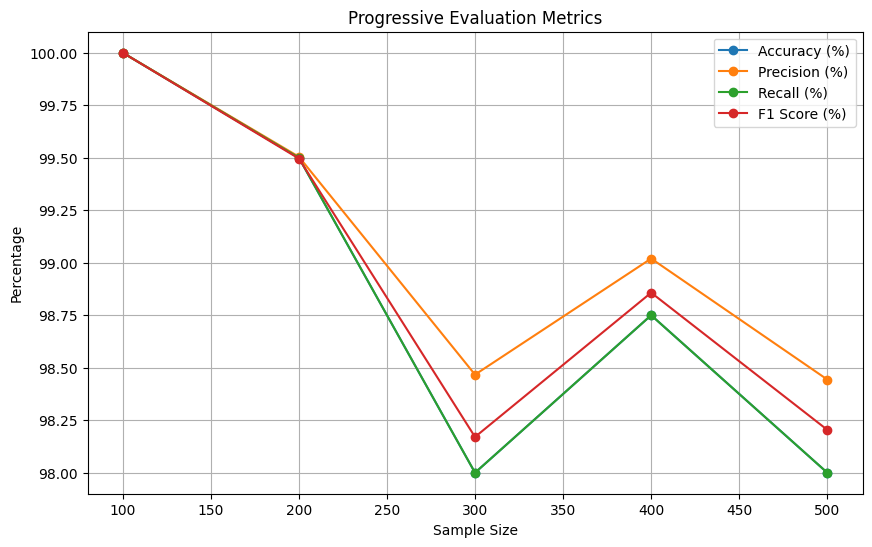

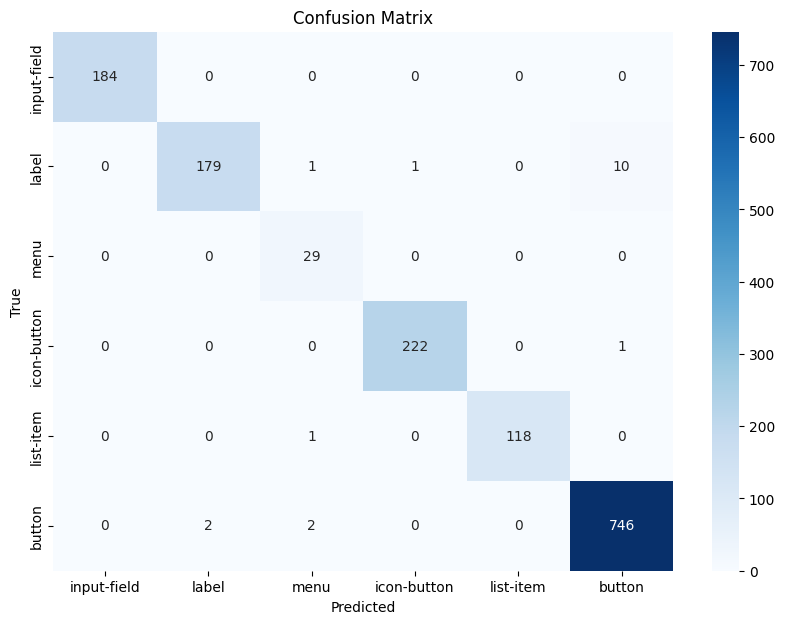

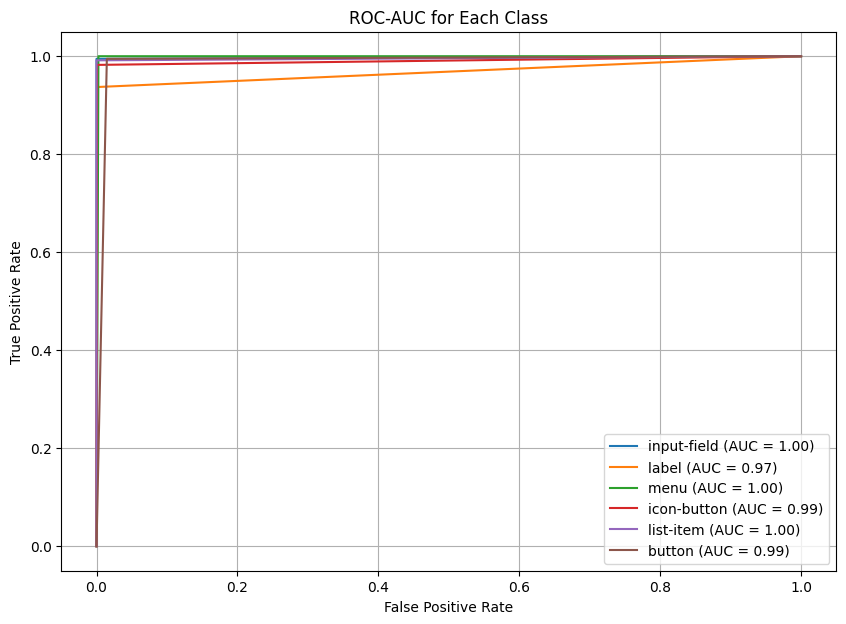

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
progressive_t5_evaluation(model, df.to_dict('records'), tokenizer, max_len=50, device=device)
